# Filters

In [4]:
import warnings
warnings.filterwarnings('ignore')

# I. Fashion-MNIST Data_Set Load

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# II. Image 확인

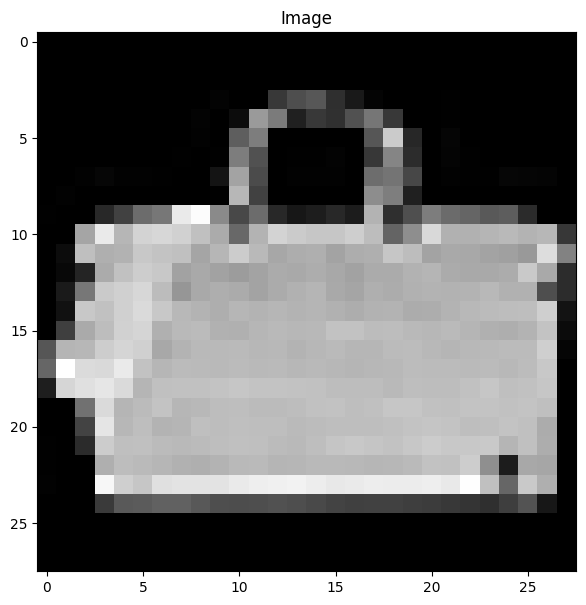

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 7))
plt.imshow(X_train[99], cmap = 'gray')
plt.title('Image')
plt.show()

# III. Filter 생성 및 Image 수정

> ## 1) 가로선 추출 필터

In [7]:
import numpy as np

H_Filter = np.array([[-1., -2., -1.],
                     [0., 0., 0.],
                     [1., 2., 1.]])
print(H_Filter)

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


> ## 2) 세로선 추출 필터

In [8]:
V_Filter = np.array([[-1., 0., 1.],
                     [-2., 0., 2.],
                     [-1., 0., 1.]])
print(V_Filter)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


> ## 3) 이미지 크기 변경

- (28 x 28) -> (27 x 27)

In [9]:
import cv2

test_image = cv2.resize(X_train[99], (27, 27))

print(X_train[99].shape, test_image.shape)

(28, 28) (27, 27)


# IV. Convolutional with Filters

> ## 1) conv_image( ) 정의

In [15]:
filter_size = 3
output_size = 25

def conv_image(filter):
    filtered_image = np.zeros((output_size, output_size))
    for i in range(output_size):
        for j in range(output_size):
            indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter
            indice_sum = np.sum(indice_image)

            if(indice_sum > 255):
                indice_sum = 255
            filtered_image[i, j] = indice_sum
    return filtered_image

> ## 2) H_Filter 적용

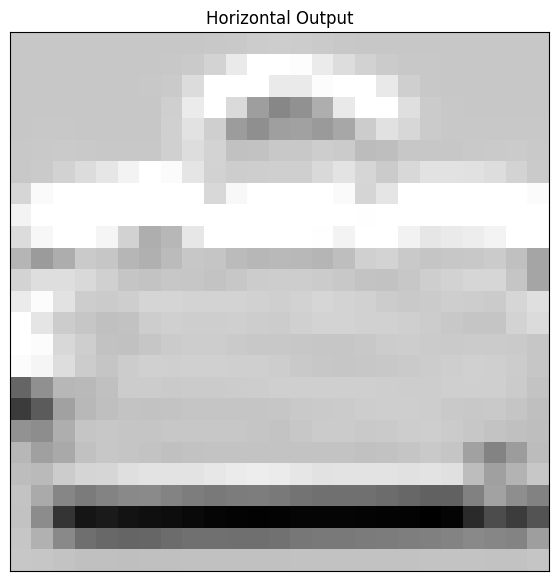

In [16]:
H_conv_image = conv_image(H_Filter)
plt.figure(figsize = (7, 7))
plt.xticks([])
plt.yticks([])
plt.title('Horizontal Output')
plt.imshow(H_conv_image, cmap = 'gray')
plt.show()

> ## 3) V_Filter 적용

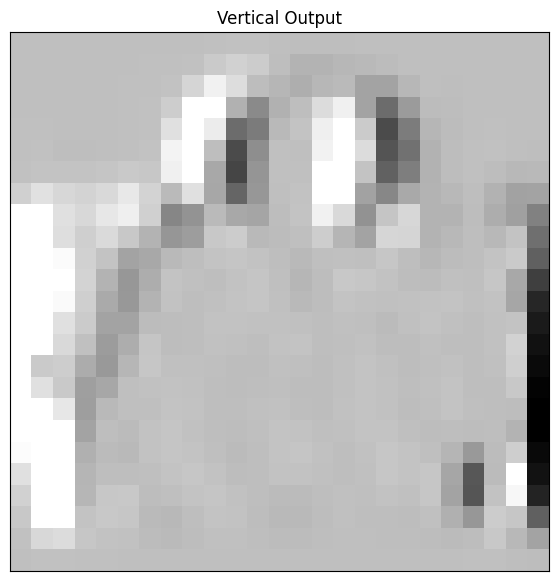

In [17]:
V_conv_image = conv_image(V_Filter)

plt.figure(figsize = (7, 7))
plt.xticks([])
plt.yticks([])
plt.title('Vertical Output')
plt.imshow(V_conv_image, cmap = 'gray')
plt.show()

# V. 최종 결과

- V_Filter and H_Filter

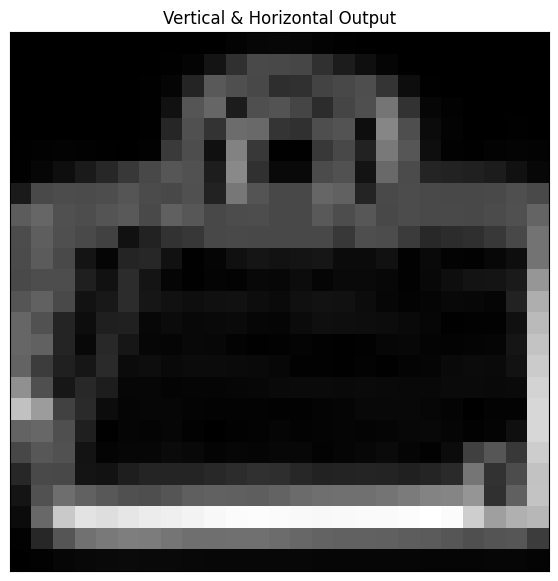

In [18]:
sobel_image = np.sqrt(np.square(H_conv_image) + np.square(V_conv_image))

plt.figure(figsize = (7, 7))
plt.xticks([])
plt.yticks([])
plt.title('Vertical & Horizontal Output')
plt.imshow(sobel_image, cmap = 'gray')

plt.show()